# Bessel's Correction

True population variance: 0.98660
Mean of sample variances, no correction applied: 0.94459
Mean of sample variances, Bessel's correction applied: 0.97717
Difference without correction: 0.04201
Difference with correction: 0.00944


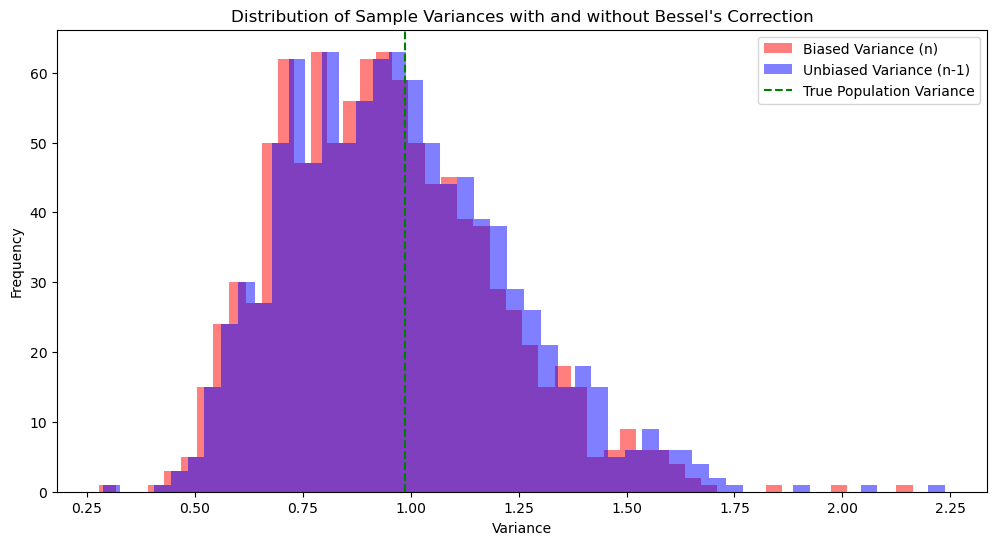

In [20]:
import numpy as np
import matplotlib.pyplot as plt

population_size = 10000  
sample_size = 30           
num_samples = 1000       

population = np.random.normal(0, 1, population_size)
true_variance = np.var(population)

variances_unbiased = []
variances_biased = []

for i in range(num_samples):
    sample = np.random.choice(population, sample_size, replace=False)
    
    biased_variance = np.var(sample, ddof=0)    #Divides by n (biased)
    unbiased_variance = np.var(sample, ddof=1)  #Divides by n - 1 (unbiased, Bessel's correction)

    variances_biased.append(biased_variance)
    variances_unbiased.append(unbiased_variance)

mean_biased_variance = np.mean(variances_biased)
mean_unbiased_variance = np.mean(variances_unbiased)

print(f"True population variance: {true_variance:.5f}")
print(f"Mean of sample variances, no correction applied: {mean_biased_variance:.5f}")
print(f"Mean of sample variances, Bessel's correction applied: {mean_unbiased_variance:.5f}")
print(f"Difference without correction: {true_variance - mean_biased_variance:.5f}")
print(f"Difference with correction: {true_variance - mean_unbiased_variance:.5f}")


plt.figure(figsize=(12, 6))
plt.hist(variances_biased, bins=50, alpha=0.5, label="Biased Variance (n)", color="red")
plt.hist(variances_unbiased, bins=50, alpha=0.5, label="Unbiased Variance (n-1)", color="blue")
plt.axvline(true_variance, color='green', linestyle='dashed', linewidth=1.5, label="True Population Variance")
plt.legend()
plt.xlabel("Variance")
plt.ylabel("Frequency")
plt.title("Distribution of Sample Variances with and without Bessel's Correction")
plt.show()